In [1]:
#general imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('Demographic_Data.csv')
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [3]:
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [5]:
data = data.drop_duplicates()
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [6]:
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [7]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


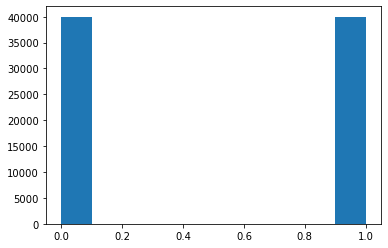

In [8]:
plt.hist(data['in-store'])
plt.show()

(array([39989.,     0.,     0., 39990.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 <a list of 4 Patch objects>)

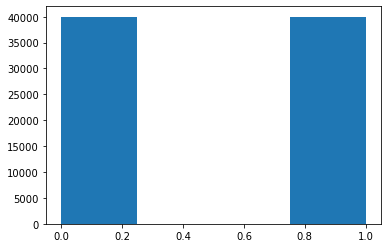

In [9]:
plt.hist(data['in-store'], bins=4) 

(array([22446., 29715., 19846.,  7972.]),
 array([18.  , 34.75, 51.5 , 68.25, 85.  ]),
 <a list of 4 Patch objects>)

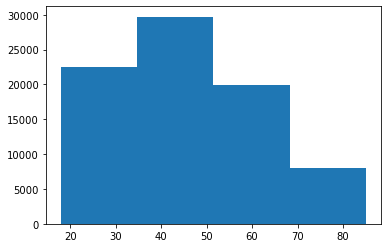

In [10]:
plt.hist(data['age'], bins=4)

(array([46593., 18038., 10315.,  5033.]),
 array([   5.0047  ,  753.753525, 1502.50235 , 2251.251175, 3000.      ]),
 <a list of 4 Patch objects>)

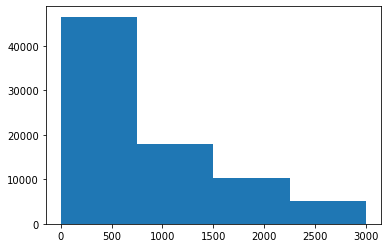

In [11]:
plt.hist(data['amount'], bins=4)

(array([15997., 19994., 18000., 25988.]),
 array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 <a list of 4 Patch objects>)

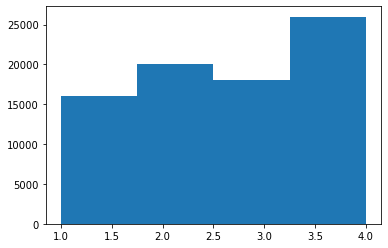

In [12]:
plt.hist(data['region'], bins=4)

In [13]:
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

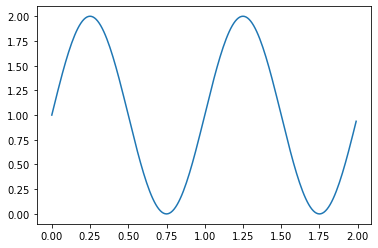

In [14]:
fig, ax = plt.subplots()
ax.plot(t, s)
plt.show()

In [15]:
data_sample = data.sample(100)

In [31]:
x = data_sample['age']
y = data_sample['amount']

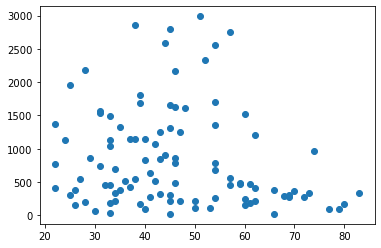

In [32]:
plt.scatter(x,y, marker='o')
plt.show()

In [18]:
x = data_sample['items']
y = data_sample['amount']

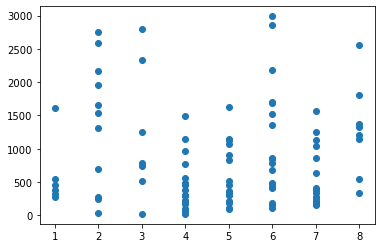

In [19]:
plt.scatter(x,y, marker='o')
plt.show()

In [20]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


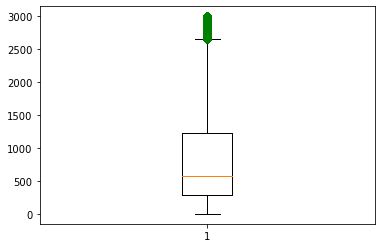

In [33]:
A = data['amount']
plt.boxplot(A,0,'gD')
plt.show()

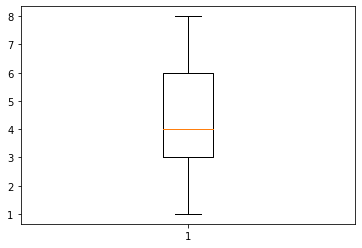

In [34]:
A = data['items']
plt.boxplot(A,0,'gD')
plt.show()

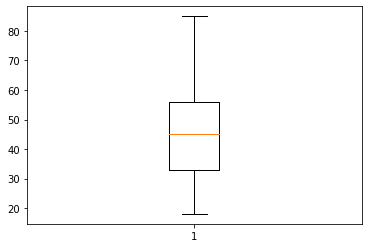

In [22]:
A = data['age']
plt.boxplot(A,0,'gD')
plt.show()

In [23]:
corr_mat = data.corr()
print(corr_mat)

          in-store       age     items    amount    region
in-store  1.000000 -0.178180 -0.003897 -0.085573 -0.133171
age      -0.178180  1.000000  0.000657 -0.282033 -0.235370
items    -0.003897  0.000657  1.000000  0.000384 -0.001904
amount   -0.085573 -0.282033  0.000384  1.000000  0.403486
region   -0.133171 -0.235370 -0.001904  0.403486  1.000000


In [24]:
cov_mat = data.cov()
print(cov_mat)

           in-store          age     items         amount      region
in-store   0.250003    -1.400071 -0.004017     -30.860425   -0.075019
age       -1.400071   246.966189  0.021270   -3196.782841   -4.167305
items     -0.004017     0.021270  4.248751       0.570791   -0.004421
amount   -30.860425 -3196.782841  0.570791  520221.252295  327.874873
region    -0.075019    -4.167305 -0.004421     327.874873    1.269321


In [25]:
data['Amount_cut']=pd.cut(data.amount, bins=[0,500,1000,1500,2000,2500,3000], labels=['0-500','500-1000','1000-1500','1500-2000','2000-2500','2500-3000'])

In [26]:
Pivot=pd.pivot_table(data,index='Amount_cut',columns='region',values='items',aggfunc='count',fill_value=0)

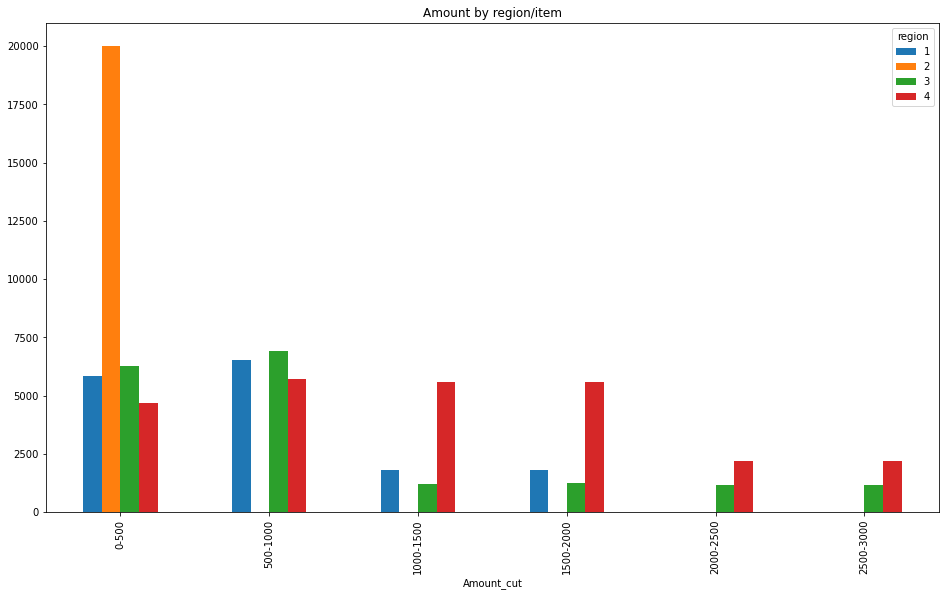

In [25]:
Pivot.plot.bar(figsize=(16, 9), title='Amount by region/item')